In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

## 1. Загрузка данных. Описание задачи

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.head(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
test.head(5)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - Целевая переменная. факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

Пропуски присутствуют и в тренировочных и в тестовых данных.

Для начала сравним тренировочную и тестовую выборку. Насколько они похожи.

In [8]:
TARGET = 'Credit Default'

train_data = train.drop(TARGET, axis=1)

Сравнение двух выборок (тренировочная и тестовая) по признакам с числовыми значениями.

**Гипотеза** 
* Нулевая гипотеза: средние значения в двух независимых выборках равны
* Альтернативная гипотеза: средние значения в двух независимых выборках различаются
* Критерий: критерий Манна-Уитни
* Уровень значимости $\alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы сравним признаки с числовыми значениями двух независимых выборок на предмет равенства мат. ожиданий. 

Annual Income
MannwhitneyuResult(statistic=9362155.5, pvalue=0.45908193952511717)


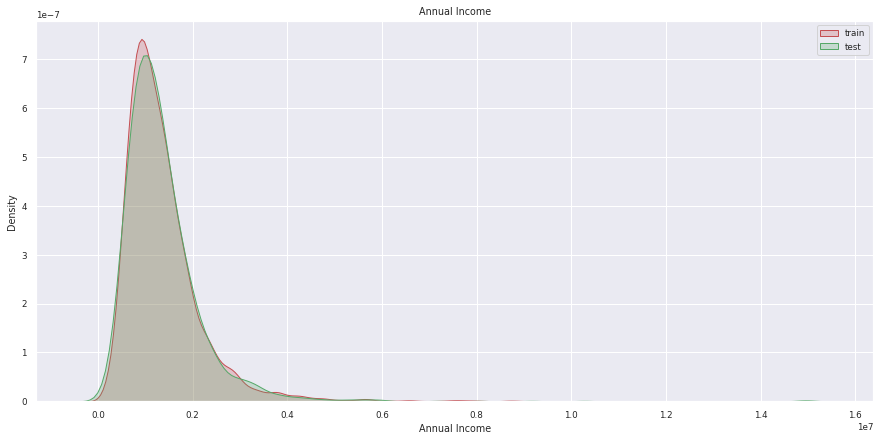

Tax Liens
MannwhitneyuResult(statistic=9336937.5, pvalue=0.09836860283803656)


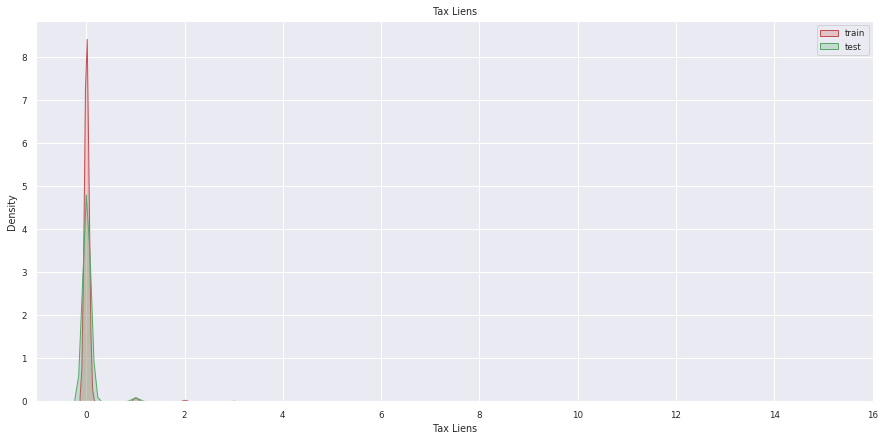

Number of Open Accounts
MannwhitneyuResult(statistic=9279311.5, pvalue=0.22142637178864455)


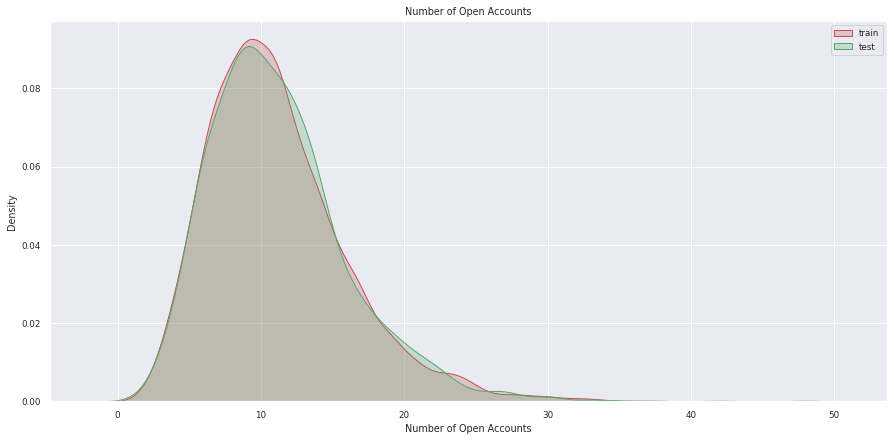

Years of Credit History
MannwhitneyuResult(statistic=9339658.0, pvalue=0.3886945952485082)


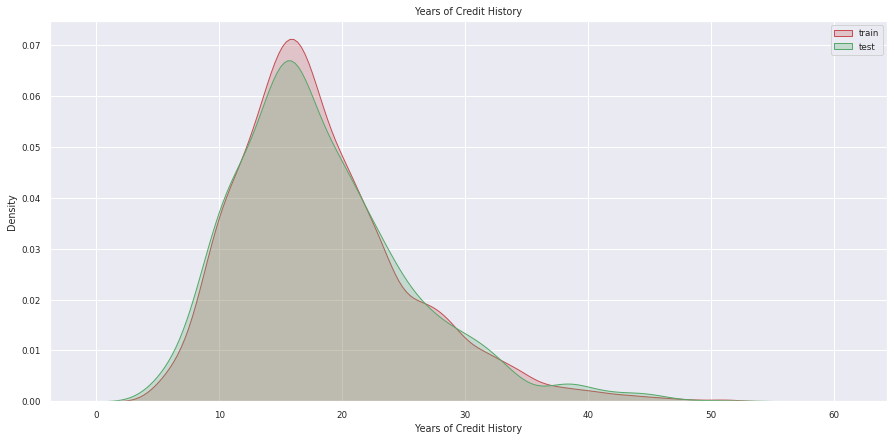

Maximum Open Credit
MannwhitneyuResult(statistic=9337869.0, pvalue=0.3832220993414893)


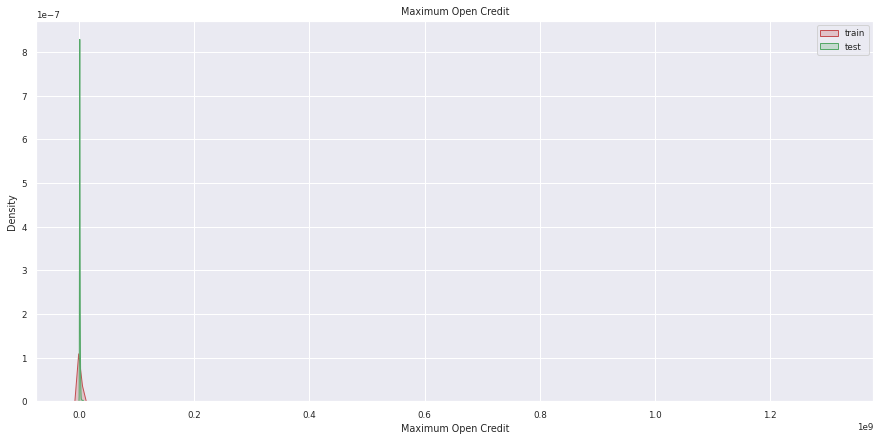

Number of Credit Problems
MannwhitneyuResult(statistic=9295513.5, pvalue=0.14195772552376257)


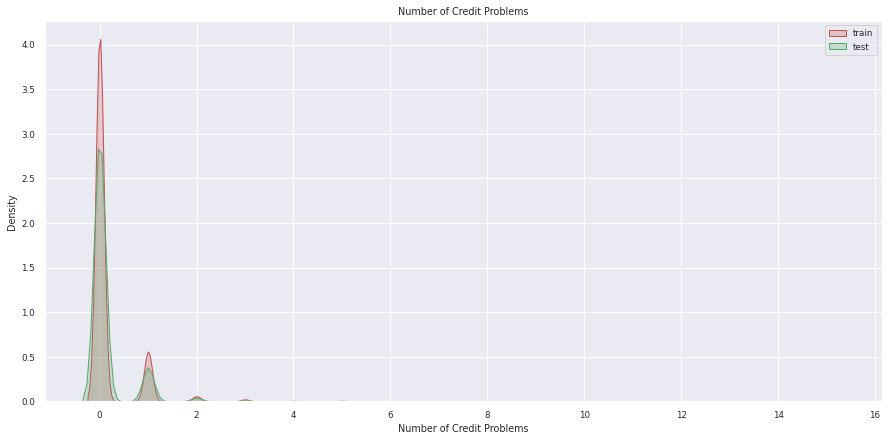

Months since last delinquent
MannwhitneyuResult(statistic=6974400.5, pvalue=1.712573746209761e-82)


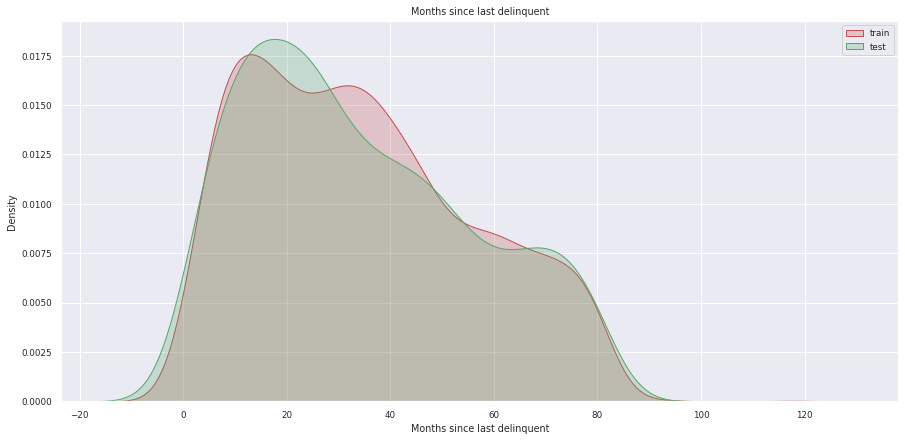

Bankruptcies
MannwhitneyuResult(statistic=9254231.0, pvalue=0.036681545859698156)


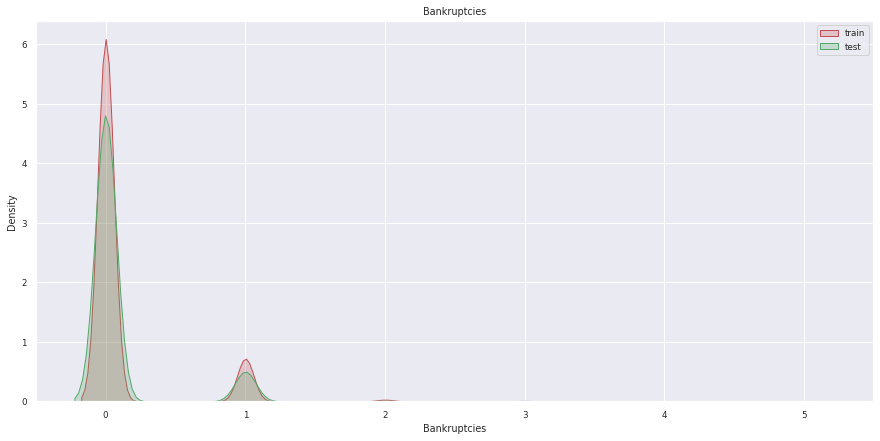

Current Loan Amount
MannwhitneyuResult(statistic=9230199.5, pvalue=0.12317435968682072)


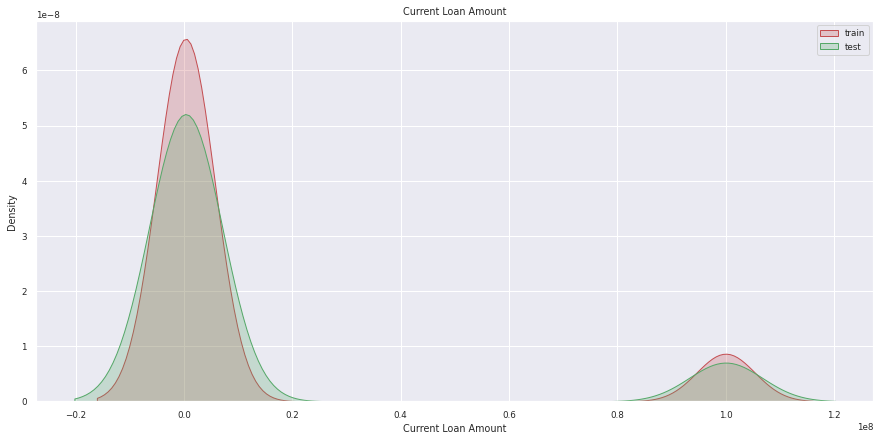

Current Credit Balance
MannwhitneyuResult(statistic=9334050.0, pvalue=0.3716147491364306)


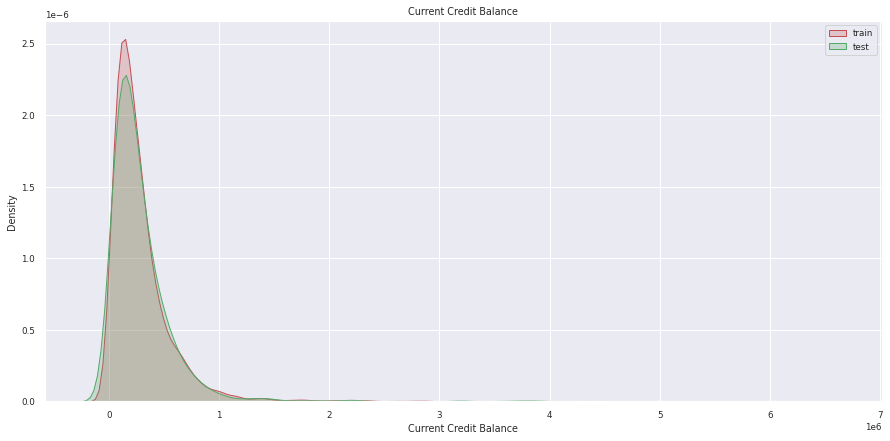

Monthly Debt
MannwhitneyuResult(statistic=9288187.0, pvalue=0.24369523330673137)


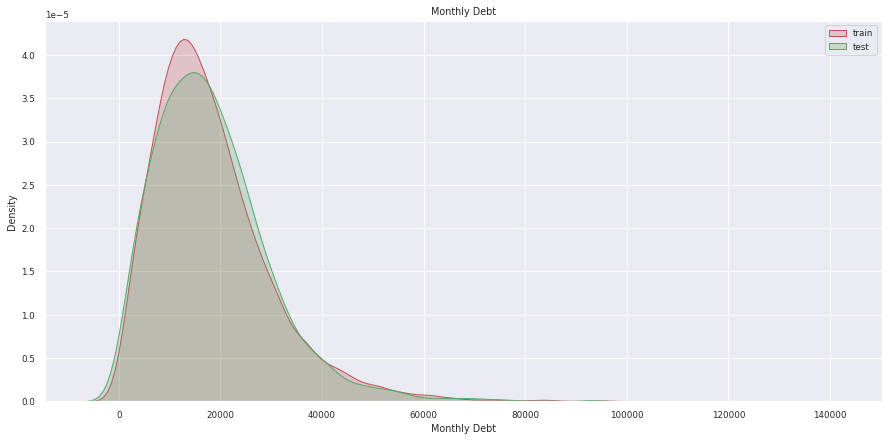

Credit Score
MannwhitneyuResult(statistic=9359581.5, pvalue=0.45091647518794764)


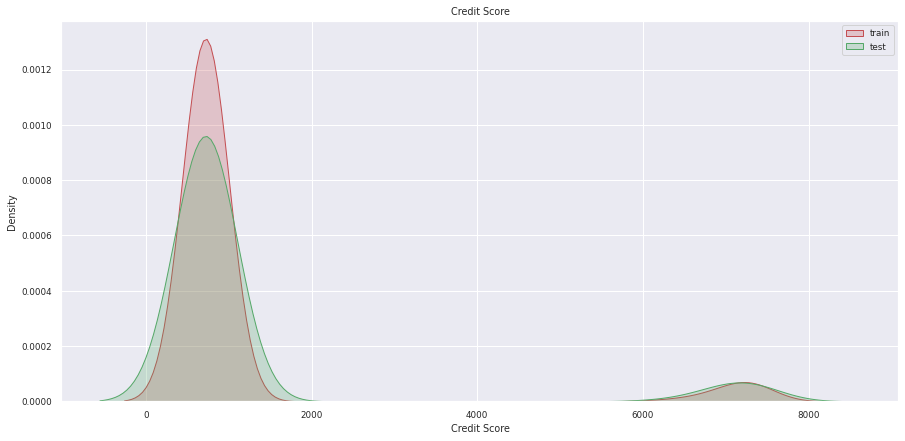

In [9]:
# признаки с числовыми значениями
NUM_FEATURES = [column for column in train_data.columns if train_data[column].dtype != 'object']

figsize = (15, 7)
for col in NUM_FEATURES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(train_data[col], shade=True, label='train', color='r')
    sns.kdeplot(test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(train_data[col], test[col]))
    plt.legend(loc='upper right')
    plt.title(col)
    plt.show()

**Вывод**

Признаки Months since last delinquent и Bankruptcies в двух независимых выборках имеют низкую согласованность. Остальные признаки распределены похожим образом в обоих выборках.

## 2. Проверка на выбросы. Обработка выбросов.

**Матрица корреляций**

Посмотрим, как коррелируют признаки с целевой переменной на тренировочной выборке.

In [10]:
def show_heatmap(data, title=None, figsize=(20, 15)):
    plt.figure(figsize=figsize)

    sns.heatmap(data, annot=True, linewidths=.5, cmap='GnBu')
    plt.title(title)
    plt.show()

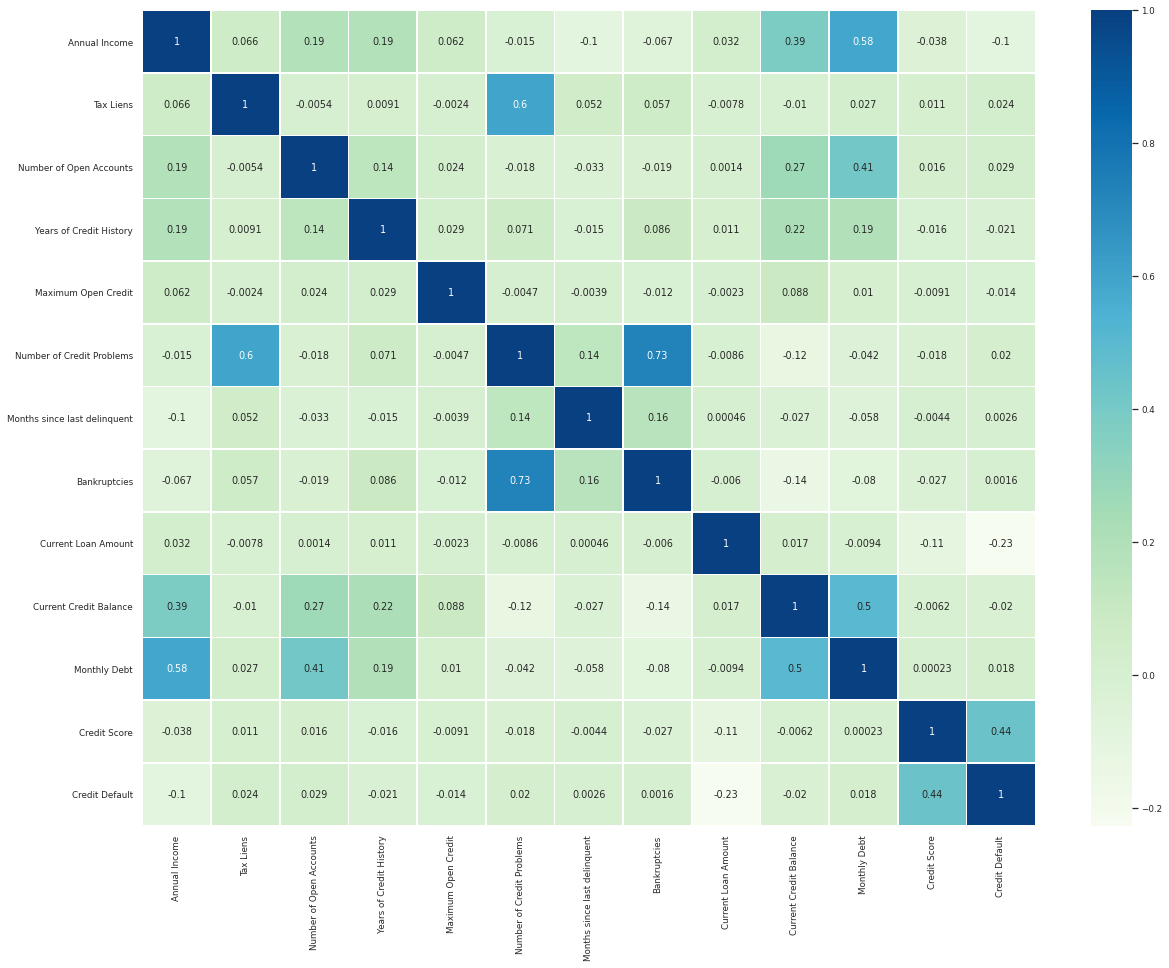

In [11]:
show_heatmap(train.corr().round(5))

Наблюдается высокая положительная корреляция Credit Score с целевой переменной (Credit Default). 

По информации из [статьи](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BA%D0%BE%D1%80%D0%B8%D0%BD%D0%B3) 

В США популярен вид кредитного скоринга FICO score, который принимает значения от 300 до 850 и 0. Часто рассчитывают на базе кредитной истории потребителей, собранной в трех крупнейших национальных бюро: Experian, Equifax, и TransUnion. Во внимание принимаются следующие составляющие: качество кредитной истории, наличие и размер текущих долгов, длительность отношений с кредиторами, соотношение количества поданных заявок и выданных кредитов, типы выданных кредитов. Заёмщик в соответствии с этим оценивается:

* выше 790 — «великолепно»
* 750—790 — средний стандартный уровень
* 740—750 — «очень хорошо»
* 720—740 — «хорошо»
* 700—720 — «плохо»
* ниже 700 — «очень плохо»

Соответственно должна наблюдаться отрицательная корреляция с целевой переменной.

Посмотрим на признак Credit Score.

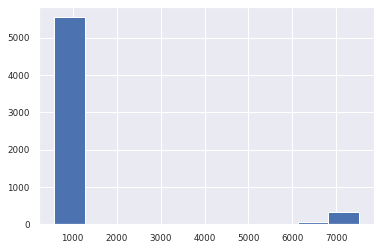

In [12]:
train['Credit Score'].hist()
plt.show()

Похоже, что присутствуют выбросы.

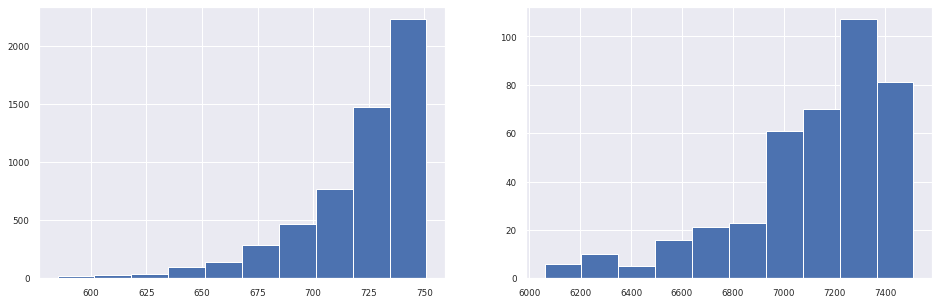

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches(16, 5)

ax[0].hist(train[train['Credit Score'] < 1e3]['Credit Score'])
ax[1].hist(train[train['Credit Score'] > 1e3]['Credit Score'])
plt.show()

Похоже, что у части наблюдений значение Credit Score выше на порядок. При этом распределения очень похожи. Проверим количество целевых меток для каждой из этих групп.

In [14]:
train[train['Credit Score'] < 1e3]['Credit Default'].value_counts()

0    4359
1    1184
Name: Credit Default, dtype: int64

In [15]:
train[train['Credit Score'] > 1e3]['Credit Default'].value_counts()

1    400
Name: Credit Default, dtype: int64

Похоже, что всем наблюдениям с завышенным Credit Score присвоен первый класс (невозврат кредита). Из-за этого и наблюдается положительная корреляция с целевой переменной.

Возможно из этого можно сделать доп признак, но поскольку нам неизвестно, каким образом распределены классы на тестовых данных, то лучше всего просто обработать этот признак - уменьшить на порядок завышенные значения.

Все изменения будут записываться в новый датафрейм, старый останется без изменений.

In [16]:
prep = train.copy()

prep.loc[prep['Credit Score'] > 1e3, 'Credit Score'] //= 10

Проверка - как изменилась корреляция признака с целевой переменной.

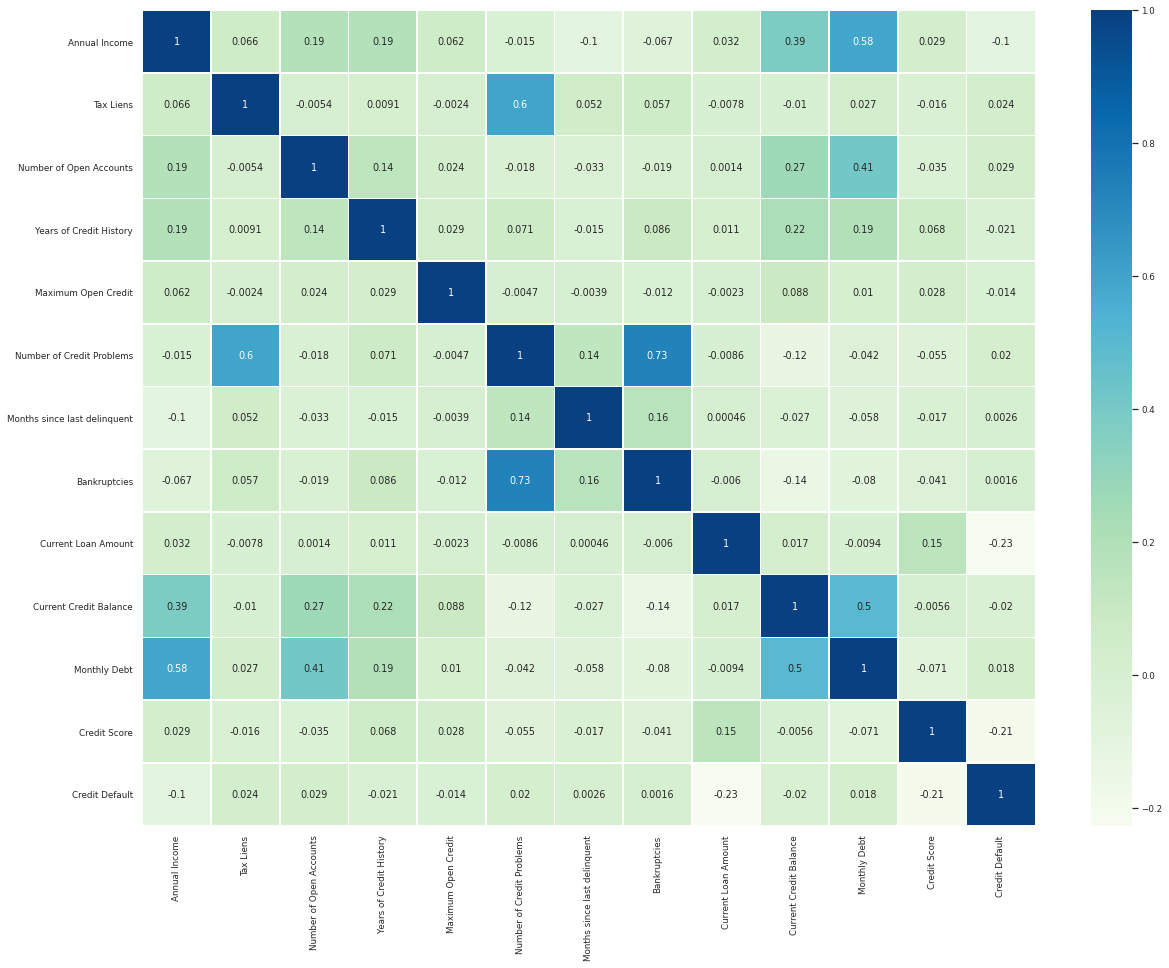

In [17]:
show_heatmap(prep.corr().round(5))

После обработки присутствует отрицательная корреляция признака с целевой переменной, что соответстует информации по кредитному скорингу.

По признаку Credit Score у части наблюдений в обеих выборках отсутствуют значения. Признак имеет довольно высокую корреляцию с целевой переменной. До тех пор пока не получим больше информации - оставляем как есть.

Проверим остальные признаки на выбросы

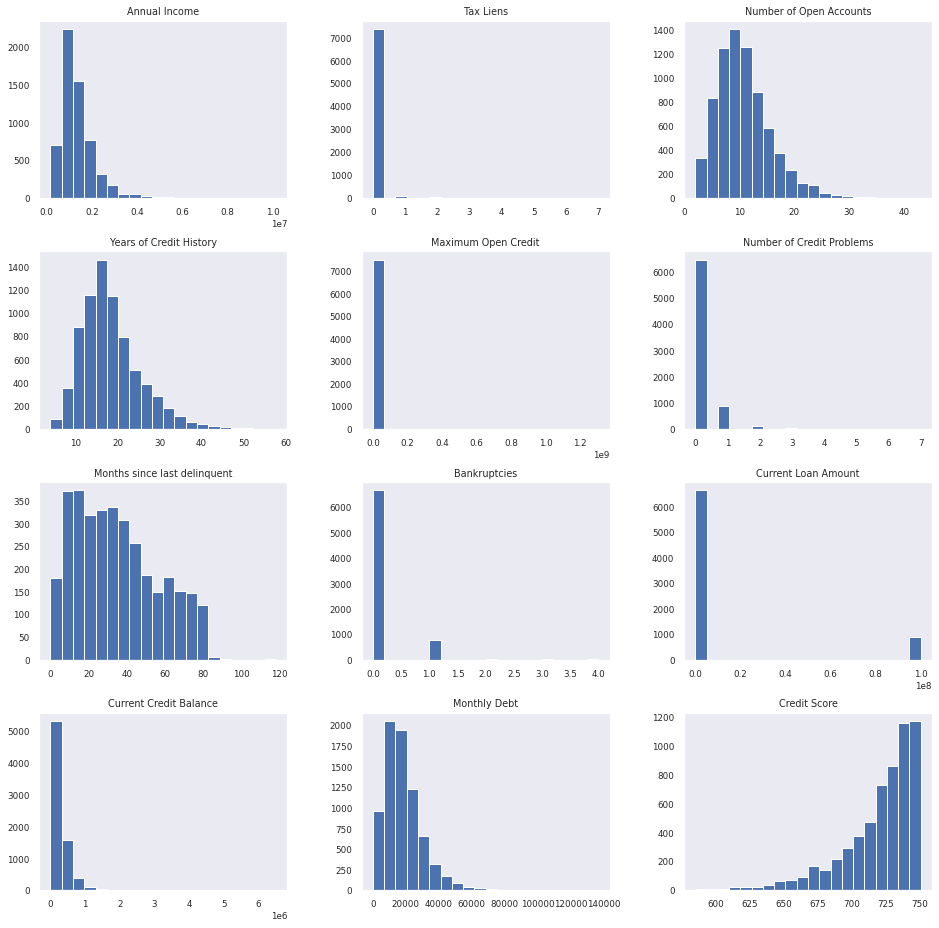

In [18]:
prep_data = prep.drop(TARGET, axis=1)

prep_data.hist(figsize=(16,16), bins=20, grid=False)
plt.show()

В признаках 'Current Loan Amount' и 'Maximum Open Credit' вероятно присутствуют выбросы.

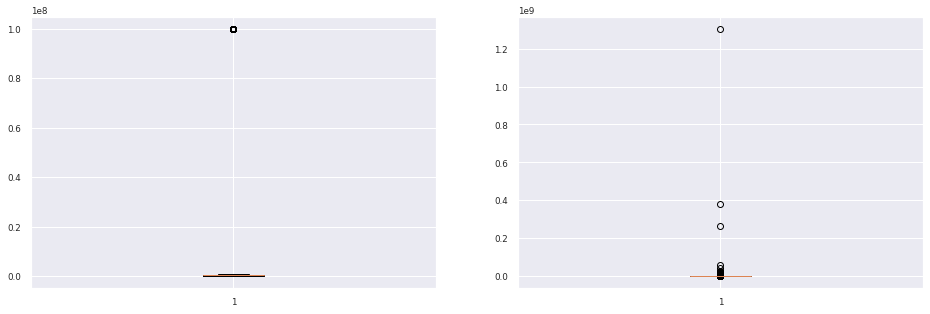

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2)

fig.set_size_inches(16, 5)

ax[0].boxplot(prep['Current Loan Amount'])
ax[1].boxplot(prep['Maximum Open Credit'])
plt.show()

Посмотрим на графике - как связаны данные признаки.

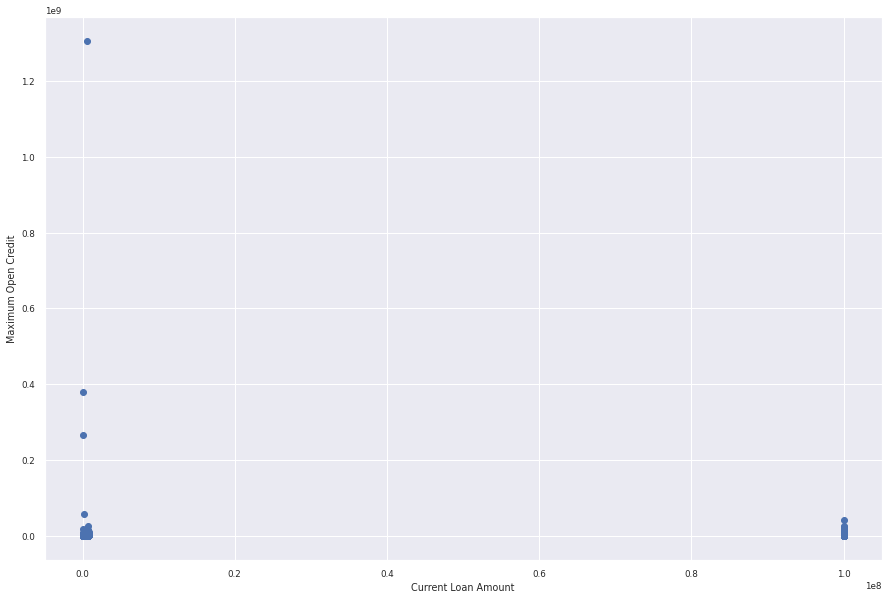

In [21]:
plt.figure(figsize=(15, 10))

plt.scatter(prep['Current Loan Amount'], prep['Maximum Open Credit'])
plt.xlabel('Current Loan Amount')
plt.ylabel('Maximum Open Credit')
plt.show()

Наблюдения c высокими значениями в одном признаке имеют невысокие значения в другом. Похоже, что это выбросы.

* Maximum Open Credit - наибольший открытый кредит
* Current Loan Amount - текущая сумма кредита

Очевидно, что текущая сумма кредита не может значительно превышать наибольший открытый кредит. Даже с учетом процентов по кредиту.

Выбросы по признаку 'Current Loan Amount' заменим на значения из признака 'Maximum Open Credit'.

In [22]:
prep.loc[
    prep['Current Loan Amount'] > 9e7, 
    'Current Loan Amount'] = \
prep[prep['Current Loan Amount'] > 9e7]['Maximum Open Credit']

Признак 'Maximum Open Credit' оставляем как есть, т.к. сумма кредита действительно может быть большой, если это, к примеру ипотека.

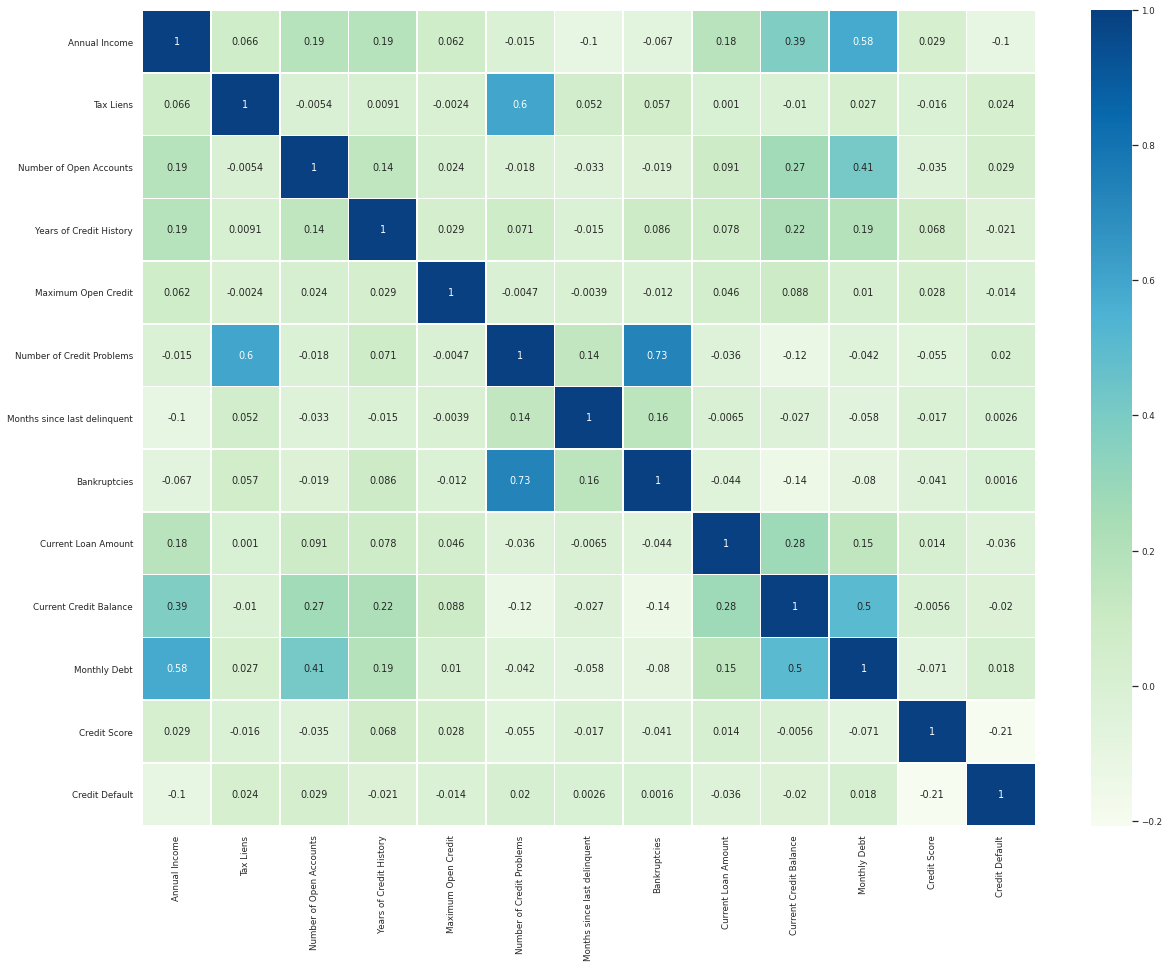

In [23]:
show_heatmap(prep.corr().round(5))

Увеличилась корреляция 'Current Loan Amount' с 'Current Credit Balance' и 'Annual Income'. Но снизилась корреляция с 'Credit Score'. Вероятно она наблюдалась из-за имевшихся выбросов.

## 3. Изучение признаков. Обработка пропущенных значений.

In [24]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

### 3.1 Bankruptcies

По признаку 'Bankruptcies' есть немного пропусков. Заполним модой.

In [25]:
prep['Bankruptcies'].fillna(prep['Bankruptcies'].mode().values[0], inplace=True)

### 3.2 Months since last delinquent

По признаку 'Months since last delinquent' более половины пропущенных значений. Т.к. в обучающей и тестовой выборках распределения по этому признаку значительно различаются, то данный признак целесообразнее всего убрать.  

In [26]:
prep = prep.drop('Months since last delinquent', axis=1)

In [27]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              5943 non-null   float64
 2   Years in current job       7129 non-null   object 
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

### 3.3 Annual Income и Years in current job

По признаку 'Annual Income' (Годовой доход) много пропущенных значений. Возможно доход связан с признаком 'Years in current job' (количество лет на текущей работе). 

По признаку 'Years in current job' у некоторых наблюдений отсутстуют значения. 

In [28]:
prep['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

Сравним годовой доход каждой категории признака 'Years in current job'. Также присвоим категорию для пропусков в признаке. Есть предположение, что значения отсутствуют, поскольку данные люди в настоящий момент не трудоустроены.

In [29]:
prep['Years in current job'].fillna('N/A', inplace=True)

In [30]:
def show_pointplot(x, y, data, figsize=(15, 8)):
    plt.figure(figsize=figsize)
    
    sns.pointplot(x=x, y=y, data=prep, capsize=.1)

    plt.title(f'Confidence intervals (95 %) for {y}')
    plt.show()

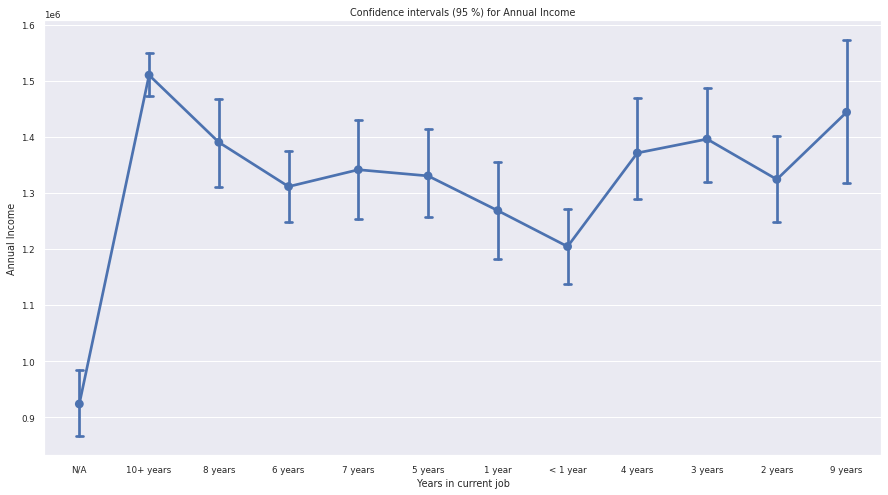

In [31]:
show_pointplot('Years in current job', 'Annual Income', prep)

Похоже, что по наблюдениям с отсутствующими значениями в признаке 'Years in current job' годовой доход значительно ниже. 

По категориям признака 'Years in current job' с заполненными значениями есть небольшие различия годового дохода. Заполним отсутствующие значения годового дохода соответствующими медианами.

In [32]:
years_categories = prep['Years in current job'].unique()

for cat in years_categories:
    prep.loc[(prep['Annual Income'].isnull()) & 
             (prep['Years in current job'] == cat), 
             'Annual Income'] = \
    prep[prep['Years in current job'] == cat]['Annual Income'].median()

Продолжим изучение признака 'Years in current job'. Проведем оценку признака в разрезе целевой переменной. 

In [33]:
def show_countplot(x, hue, data, title=None, figsize=(10, 8)):
    plt.figure(figsize=figsize)

    sns.countplot(x=x, hue=hue, data=data)
    plt.title(f'{x} grouped by {hue}')
    plt.legend(title=title, loc='upper right')

    plt.show()

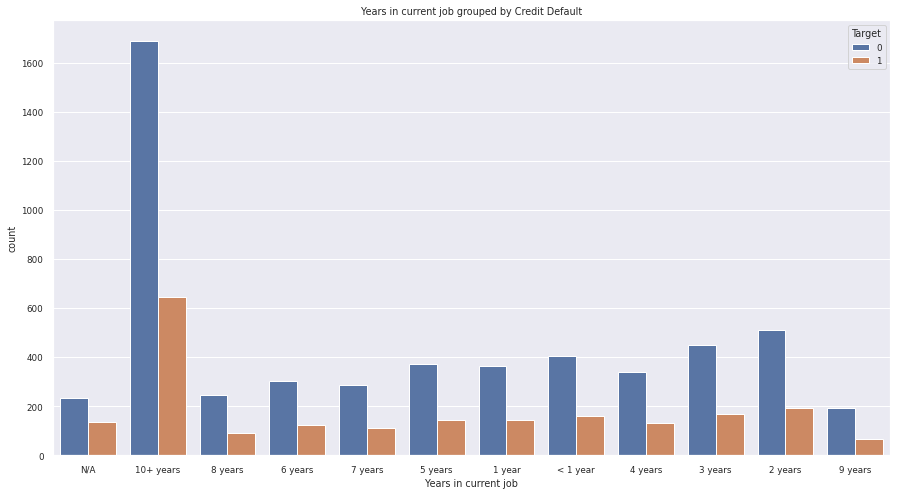

In [34]:
show_countplot('Years in current job', 'Credit Default', prep, title='Target', figsize=(15, 8))

По графику наблюдается схожесть долей в разрезе целевой переменной для заполненных значений по признаку. Для отстутствующих, напротив - наблюдается различие с остальными категориями. Проверим, насколько статистически значимое данное различие. 

**Гипотеза** 

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы для всех категорий признака
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости $\alpha$: 0.05
* Критическая область: двухсторонняя

Для быстрой проверки гипотезы воспользуемся следующей функцией.

In [35]:
def p_values_matrix(X, feature_name, target_name):
    '''Функция возвращает датафрейм, где по столбцам и строкам все категории признака.
    На пересечении категорий рассчитанный p-value по критерию Хи-квадрат Пирсона 
    по наблюдаемым частотам переменной для этих двух категорий.'''
    df = X.copy()
    unique_cats = df[feature_name].unique()
    
    arr = np.eye(unique_cats.shape[0])
    
    for i, cat_1 in enumerate(unique_cats):
        for j, cat_2 in enumerate(unique_cats[i+1:]):
            j += i+1
            
            feature_and_target = df.loc[df[feature_name].isin([cat_1, cat_2]), [feature_name, target_name]]
            feature_and_target['Id'] = feature_and_target.index
            table = feature_and_target.pivot_table(values='Id', index=feature_name, columns=target_name, aggfunc='count')
            _, p, _, _ = chi2_contingency(table)
            
            arr[i, j] = p
            arr[j, i] = p
    return pd.DataFrame(arr, columns=unique_cats, index=unique_cats)

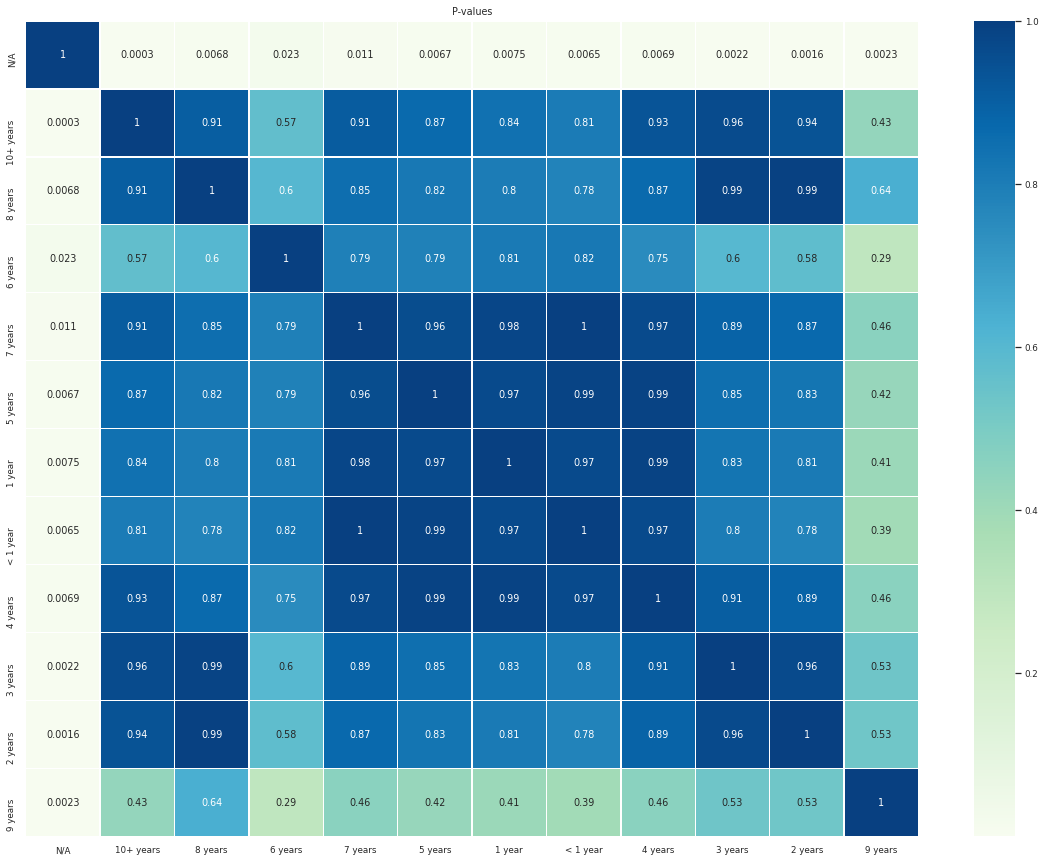

In [36]:
p_values = p_values_matrix(prep, 'Years in current job', 'Credit Default')

show_heatmap(p_values.round(5), title='P-values')

**Вывод**

Различия наблюдаемых частот целевой переменной не являются статистически значимыми для наблюдений с заполненными значениями признака. При этом различие между заполненными и не заполненными значениями является статистически значимым. Признак из категориального можно привести к бинарному виду. Где значения: 1 - не трудоустроен, 0 - трудоустроен

In [37]:
prep.rename(columns={'Years in current job': 'is_unemployed'}, inplace=True)
prep['is_unemployed'] = (prep['is_unemployed'] == 'N/A').astype('uint8')

In [38]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   is_unemployed              7500 non-null   uint8  
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  Term                       7500 non-null   object 
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

Продолжим изучение категориальных признаков.

### 3.4 Home Ownership

In [39]:
prep['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

В признаке две категории с ипотекой - 'Home Mortgage' и 'Have Mortgage'. Наблюдений с категорией 'Have Mortgage' незначительное количество, присвоим им категорию 'Home Mortgage'.

In [40]:
prep.loc[prep['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'

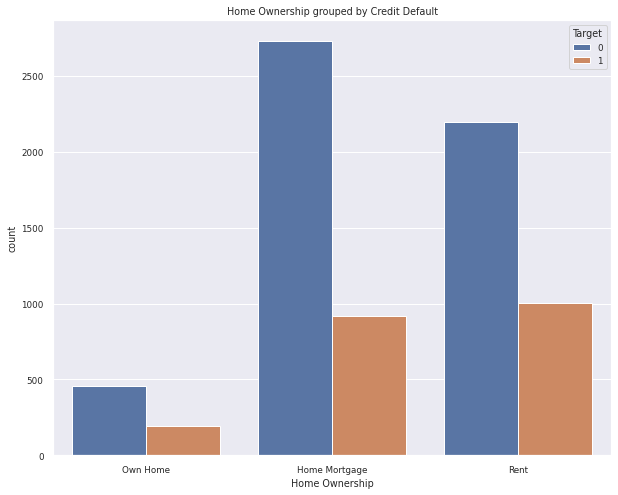

In [41]:
show_countplot('Home Ownership', 'Credit Default', prep, title='Target')

По графику наблюдаются различия долей в разрезе целевой переменной по категориям в признаке. Проверим, насколько статистически значимы данные различия. 

**Гипотеза** 

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы для всех категорий признака
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости $\alpha$: 0.05
* Критическая область: двухсторонняя

Воспользуемся функцией написанной ранее.

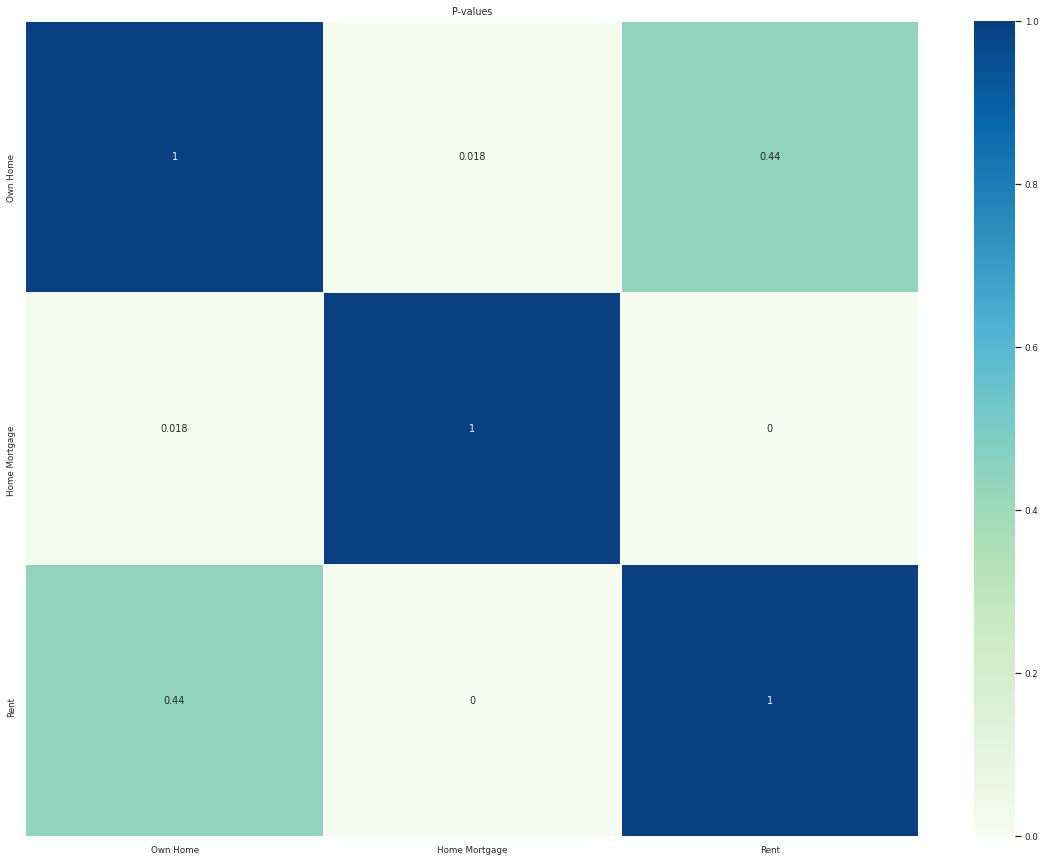

In [42]:
p_values = p_values_matrix(prep, 'Home Ownership', 'Credit Default')

show_heatmap(p_values.round(5), title='P-values')

**Вывод**

Различия наблюдаемых частот целевой переменной у категории 'Home Mortgage' с остальными категориями признака являются статистически значимыми. 

Различие категорий 'Own Home' и 'Rent' не является статистически значимым.

Несмотря на то что различие категорий 'Own Home' и 'Rent' не является статистически значимым, оставим данные категории без изменений.

### 3.5 Purpose

In [43]:
prep['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [44]:
prep[prep['Purpose'] == 'renewable energy']

,Home Ownership,Annual Income,is_unemployed,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
2223,Home Mortgage,1327473.0,0,0.0,3.0,22.6,295218.0,0.0,0.0,renewable energy,Long Term,215468.0,198341.0,6421.0,NaN,1
7082,Own Home,1159494.0,0,0.0,14.0,27.9,182094.0,0.0,0.0,renewable energy,Short Term,21912.0,49533.0,9878.0,NaN,1


Всего два наблюдения с категорией 'renewable energy' и по обоим кредитный дефолт. Добавим их в категорию с самой большой долей невозвратов.

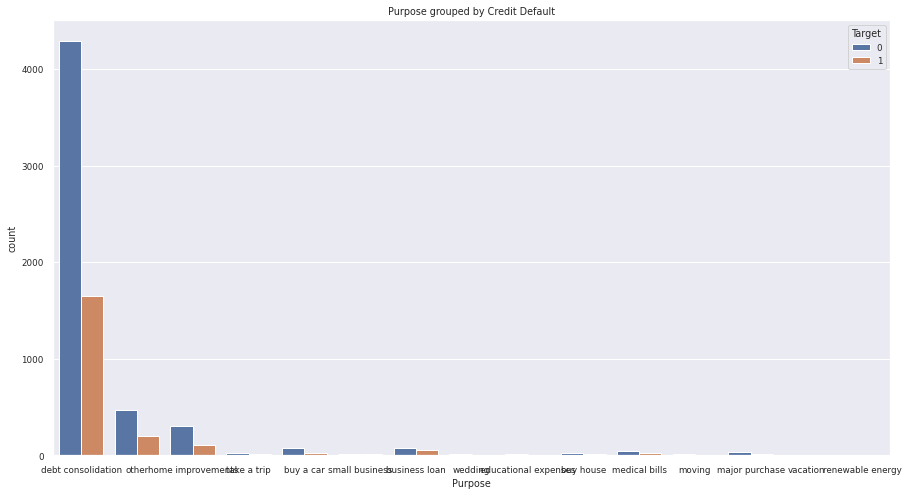

In [45]:
show_countplot('Purpose', 'Credit Default', prep, title='Target', figsize=(15, 8))

In [46]:
prep.groupby(['Purpose', 'Credit Default'])['Credit Default'].count()

Purpose               Credit Default
business loan         0                   74
                      1                   55
buy a car             0                   72
                      1                   24
buy house             0                   25
                      1                    9
debt consolidation    0                 4290
                      1                 1654
educational expenses  0                    9
                      1                    1
home improvements     0                  304
                      1                  108
major purchase        0                   31
                      1                    9
medical bills         0                   49
                      1                   22
moving                0                    9
                      1                    2
other                 0                  468
                      1                  197
renewable energy      1                    2
small business    

Самая большая доля невозвратов по бизнес кредитам. Объединим категорию 'renewable energy' с категорией 'business loan'.

In [47]:
prep.loc[prep['Purpose'] == 'renewable energy', 'Purpose'] = 'business loan'

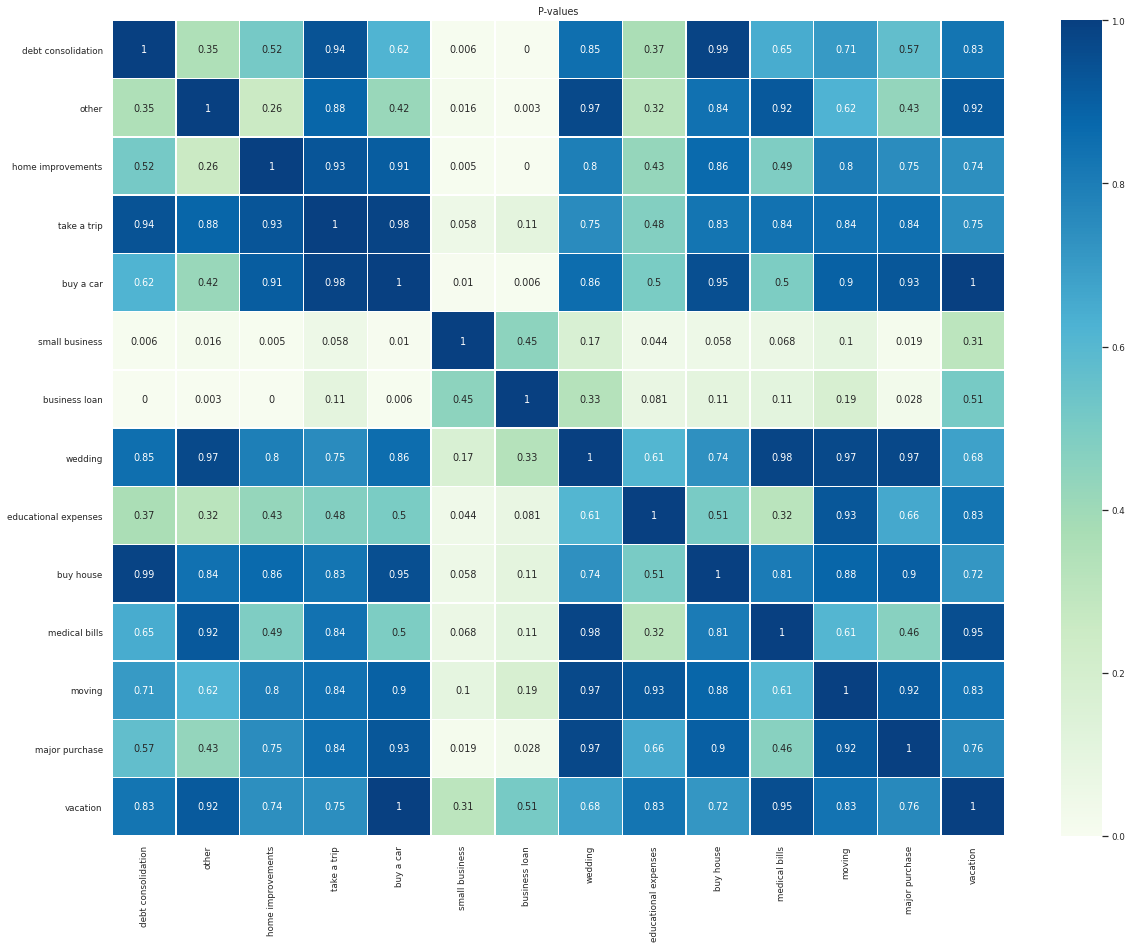

In [48]:
p_values = p_values_matrix(prep, 'Purpose', 'Credit Default')

show_heatmap(p_values.round(3), title='P-values')

Категории 'small business' и 'business loan' можно объединить в одну.

In [49]:
prep.loc[prep['Purpose'] == 'small business', 'Purpose'] = 'business loan'

Объединим похожие категории.

In [51]:
prep.loc[prep['Purpose'] == 'buy a car', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'buy house', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'moving', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'wedding', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'take a trip', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'home improvements', 'Purpose'] = 'major purchase'
prep.loc[prep['Purpose'] == 'educational expenses', 'Purpose'] = 'major purchase'

prep.loc[prep['Purpose'] == 'vacation', 'Purpose'] = 'other'
prep.loc[prep['Purpose'] == 'medical bills', 'Purpose'] = 'other'

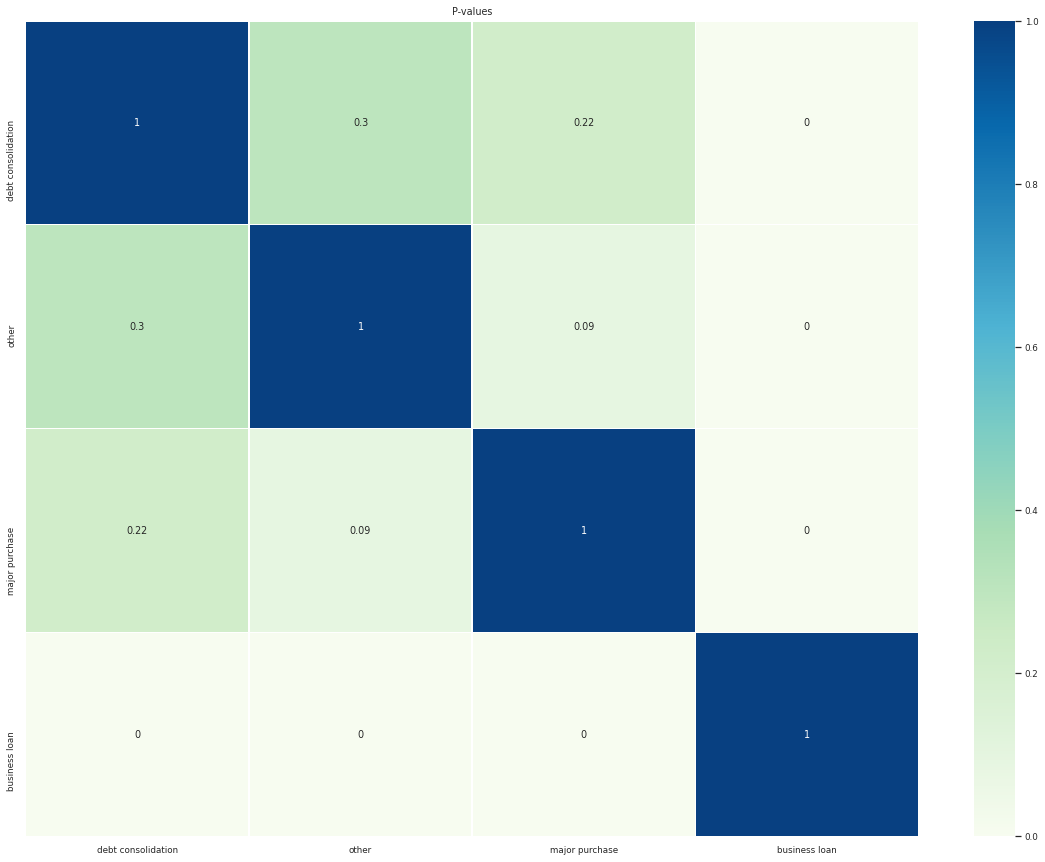

In [52]:
p_values = p_values_matrix(prep, 'Purpose', 'Credit Default')

show_heatmap(p_values.round(3), title='P-values')

Получились различимые категории по признаку 'Purpose'.

### 3.6 Term

In [53]:
prep['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

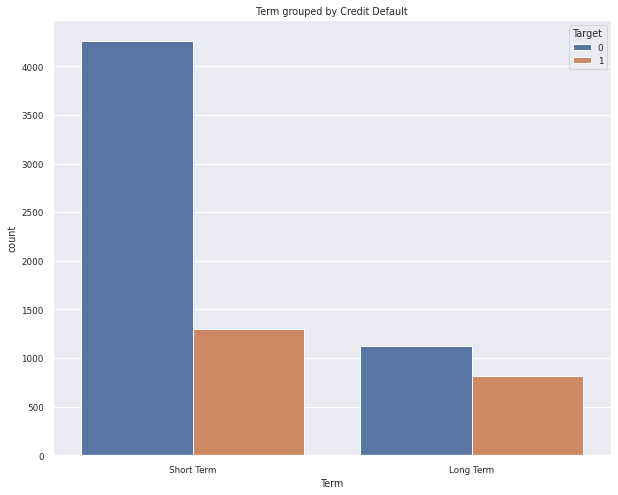

In [54]:
show_countplot('Term', 'Credit Default', prep, title='Target')

По графику наблюдается различие долей в разрезе целевой переменной для категорий признака. 

Похоже, что вероятность невыплаты кредита связана с его сроком. Больший срок - больше вероятность невыплаты. Приведем признак к бинарному виду, где 0 - краткосрочный кредит, 1 - долгосрочный.

In [55]:
prep.rename(columns={'Term': 'is_long_term'}, inplace=True)
prep['is_long_term'] = (prep['is_long_term'] == 'Long Term').astype('uint8')

In [56]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   is_unemployed              7500 non-null   uint8  
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  is_long_term               7500 non-null   uint8  
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

### 3.7 Credit Score

По признаку Credit Score много пропущенных значений. Проверим корреляцию других признаков с данным признаком.

In [57]:
def show_barplot(data, figsize=(10, 8)):
    plt.figure(figsize=figsize)
    sns.barplot(x=data.values, y=data.index)
    
    if data.name is not None:
        plt.title(f'Correlation with {data.name}')
    plt.show()

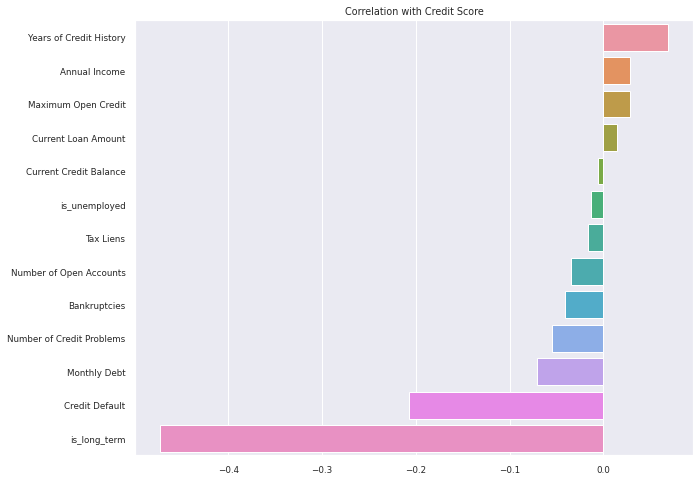

In [58]:
corr_with_score = prep.corr()['Credit Score'].sort_values(ascending=False)[1:]

show_barplot(corr_with_score)

По графику наблюдается высокая отрицательная корреляция признака 'is_long_term' с признаком 'Credit Score'.

Вероятно мат.ожидание 'Credit Score' для наблюдений с коротким сроком кредита отличается от мат.ожидания 'Credit Score' для наблюдений с продолжительным сроком кредита. Сформулируем гипотезу.

**Гипотеза**

* Нулевая гипотеза: математические ожидания в двух независимых выборках равны
* Альтернативная гипотеза: математические ожидания в двух независимых выборках различаются
* Критерий: критерий Манна-Уитни
* Уровень значимости 𝛼: 0.05
* Критическая область: двухсторонняя

In [59]:
credit_score_short_term = prep[prep['is_long_term'] == 0]['Credit Score']
credit_score_long_term = prep[prep['is_long_term'] == 1]['Credit Score']

mannwhitneyu(credit_score_short_term, credit_score_long_term)

MannwhitneyuResult(statistic=3236275.5, pvalue=3.287351490059609e-153)

Значение p-value значительно ниже критического. Соответственно нулевая гипотеза о равности математических ожиданий отвергается. Построим доверительные интервалы для данных выборок.

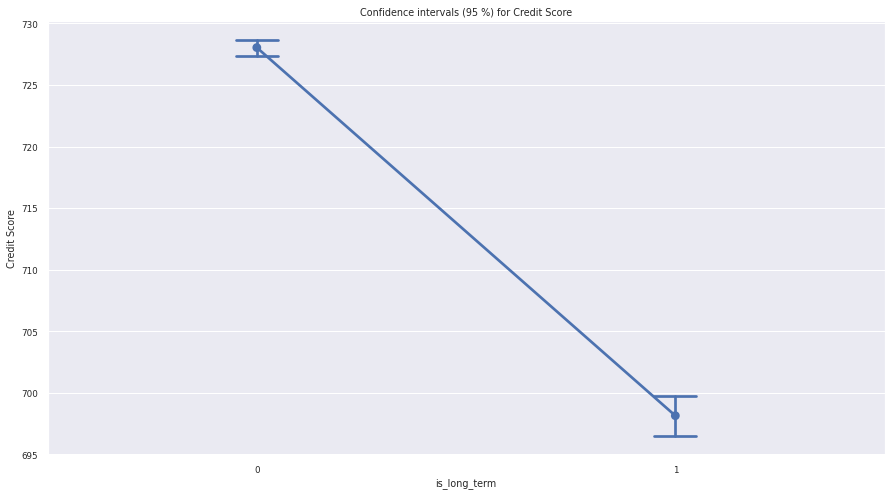

In [60]:
show_pointplot('is_long_term', 'Credit Score', prep)

Заполним отсутствующие значения Credit Score соответствующими медианами.

In [61]:
terms = prep['is_long_term'].unique()

for term in terms:
    prep.loc[(prep['Credit Score'].isnull()) & 
             (prep['is_long_term'] == term), 
             'Credit Score'] = \
    prep[prep['is_long_term'] == term]['Credit Score'].median()

In [62]:
prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Home Ownership             7500 non-null   object 
 1   Annual Income              7500 non-null   float64
 2   is_unemployed              7500 non-null   uint8  
 3   Tax Liens                  7500 non-null   float64
 4   Number of Open Accounts    7500 non-null   float64
 5   Years of Credit History    7500 non-null   float64
 6   Maximum Open Credit        7500 non-null   float64
 7   Number of Credit Problems  7500 non-null   float64
 8   Bankruptcies               7500 non-null   float64
 9   Purpose                    7500 non-null   object 
 10  is_long_term               7500 non-null   uint8  
 11  Current Loan Amount        7500 non-null   float64
 12  Current Credit Balance     7500 non-null   float64
 13  Monthly Debt               7500 non-null   float

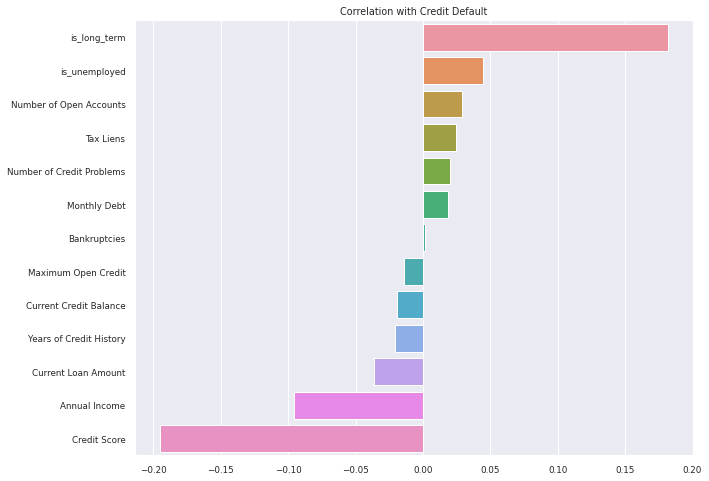

In [63]:
corr_with_target = prep.corr()['Credit Default'].sort_values(ascending=False)[1:]

show_barplot(corr_with_target)

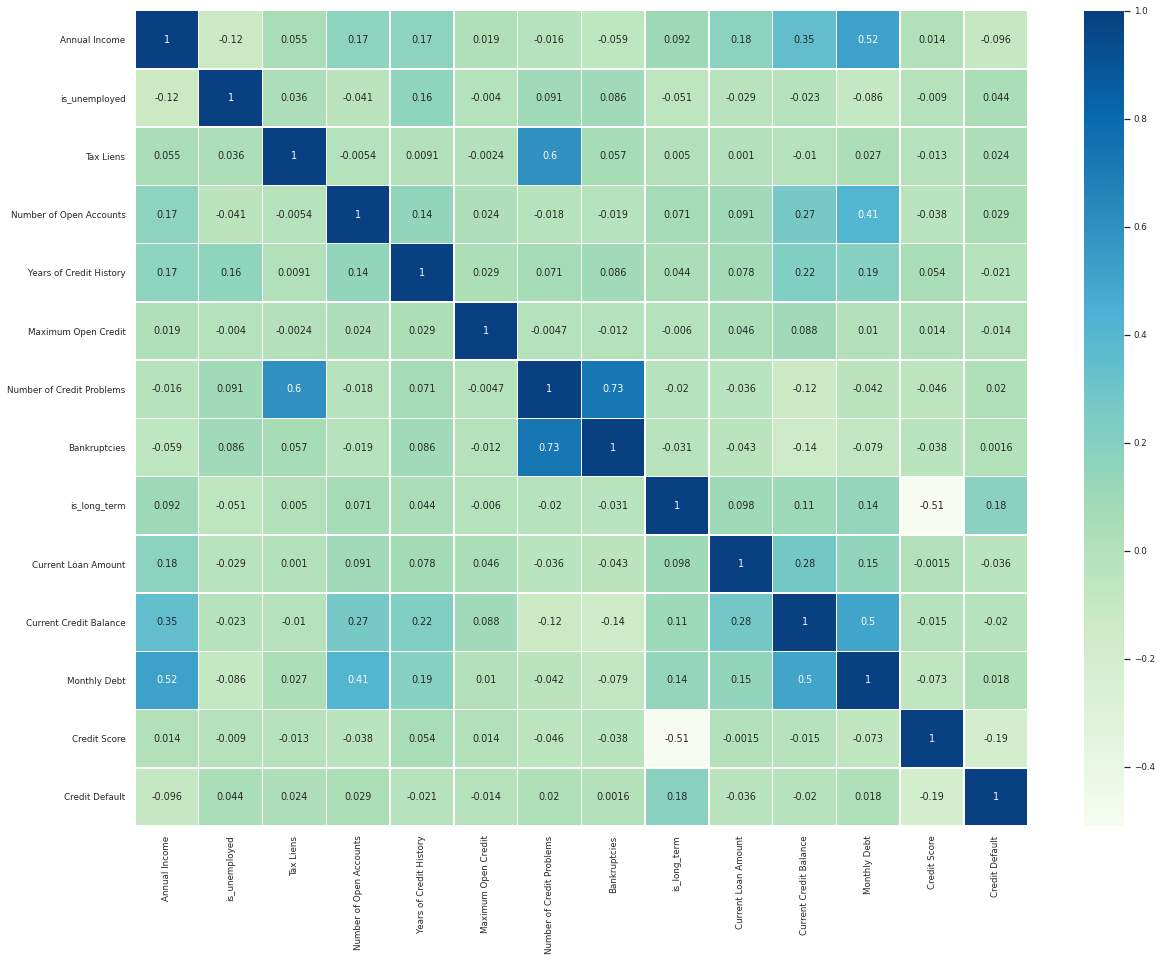

In [64]:
show_heatmap(prep.corr().round(5))

## 4. Построение модели.

Для начала реализуем предобработку данных как класс - для возможности дальнейшего использования в пайплайнах.

In [65]:
class DataPreprocessing:
    
    def __init__(self, purpose, home_ownership, features=None):        
        self.purpose = purpose
        self.home_ownership = home_ownership
        self.features = features
    
    def fit(self, X, *_):
        prep_df = X.copy()
        
        prep_df['Years in current job'].fillna('N/A', inplace=True)
        
        # медианы для категорий
        self.income_medians = {}
        for years in prep_df['Years in current job'].unique():
            self.income_medians[years] = prep_df[prep_df['Years in current job'] == years]['Annual Income'].median()
        
        prep_df.loc[prep_df['Credit Score'] > 1e3, 'Credit Score'] //= 10
        # медианы для категорий
        self.score_medians = {}
        for term in prep_df['Term'].unique():
            self.score_medians[term] = prep_df[prep_df['Term'] == term]['Credit Score'].median()
        
        self.bankruptcies_mode = prep_df['Bankruptcies'].mode().values[0]
        
        return self
        
    def transform(self, X, **_):
        prep_df = X.copy()
        
        prep_df['Years in current job'].fillna('N/A', inplace=True)
        
        # заполнение медианами по категориям
        for key in self.income_medians:
            prep_df.loc[
                (prep_df['Annual Income'].isnull()) & 
                (prep_df['Years in current job'] == key), 
                'Annual Income'] = \
            self.income_medians[key]
        
        # приведение к бинарному признаку
        prep_df.rename(columns={'Years in current job': 'is_unemployed'}, inplace=True)
        prep_df['is_unemployed'] = (prep_df['is_unemployed'] == 'N/A').astype('uint8')
        
        prep_df.loc[prep_df['Credit Score'] > 1e3, 'Credit Score'] //= 10
        
        # заполнение медианами по категориям
        for key in self.score_medians:
            prep_df.loc[
                (prep_df['Credit Score'].isnull()) & 
                (prep_df['Term'] == key), 
                'Credit Score'] = \
            self.score_medians[key]
        
        # приведение к бинарному признаку
        prep_df.rename(columns={'Term': 'is_long_term'}, inplace=True)
        prep_df['is_long_term'] = (prep_df['is_long_term'] == 'Long Term').astype('uint8')
               
        # заполнение модой
        prep_df['Bankruptcies'].fillna(self.bankruptcies_mode, inplace=True)
        
        # удаление признака
        prep_df.drop('Months since last delinquent', axis=1, inplace=True)
        
        # объединение категорий
        for key in self.purpose:
            prep_df.loc[prep_df['Purpose'].isin(self.purpose[key]), 'Purpose'] = key
            
        for key in self.home_ownership:
            prep_df.loc[prep_df['Home Ownership'].isin(self.home_ownership[key]), 'Home Ownership'] = key
        
        prep_df = pd.get_dummies(prep_df)
        
        if self.features is not None:
            prep_df = prep_df[self.features]
        
        return prep_df
    
    def fit_transform(self, X, y=None, **_):
        return self.fit(X).transform(X)

In [66]:
# объединение категорий.
# ключ словаря - категория в которую объединяются категории из кортежа (значение словаря)
purpose = {
    'major purchase': ('buy a car', 
                       'buy house', 
                       'moving', 
                       'wedding', 
                       'take a trip', 
                       'home improvements', 
                       'educational expenses',), 
    'business loan': ('small business', 
                      'renewable energy',), 
    'other': ('vacation', 
              'medical bills',)
}

home_ownership = {'Home Mortgage': ('Have Mortgage',)}

Для лучшего результата - будем осуществлять подбор гиперпараметров по сетке.

В качестве модели будем использовать LightGBM - модель более быструю, в сравнении с другими бустинговыми алгоритмами. Скорость важна при подборе гиперпараметров по сетке.

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline


def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [67]:
X = train.drop(TARGET, axis=1)
y = train[TARGET]

In [68]:
# зададим веса для классов
labels, counts = np.unique(y.values, return_counts=True)

weights = (counts/sum(counts))[::-1]
lgbm_weight = dict(zip(labels, weights))

In [70]:
preprocessing = DataPreprocessing(purpose, home_ownership)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
%%time
param_grid = {
    'estimator__max_depth': range(1, 10), 
    'estimator__n_estimators': range(100, 1001, 100), 
    'estimator__num_leaves': range(10, 100, 10), 
    'estimator__min_data_in_leaf': range(50, 150, 10)
}


pipe = Pipeline([('preprocessing', DataPreprocessing(purpose, home_ownership)), 
                 ('estimator', LGBMClassifier(class_weight=lgbm_weight))])


gs = GridSearchCV(pipe, param_grid, scoring='f1', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
TRAIN

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      4328
           1       0.44      0.76      0.56      1672

    accuracy                           0.67      6000
   macro avg       0.66      0.70      0.65      6000
weighted avg       0.75      0.67      0.68      6000

TEST

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1059
           1       0.43      0.72      0.54       441

    accuracy                           0.64      1500
   macro avg       0.64      0.67      0.62      1500
weighted avg       0.72      0.64      0.66      1500

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               645  414
1               123  318
CPU times: user 6min 33s, sys: 26.9 s, total: 7min
Wall time: 2h 9min 17s


In [118]:
params = gs.best_params_.copy()

keys = list(params.keys())

for key in keys:
    new_key = key.replace('estimator__', '')
    params[new_key] = params.pop(key)
    
params

{'max_depth': 2, 'min_data_in_leaf': 60, 'n_estimators': 200, 'num_leaves': 10}

In [119]:
pipe = Pipeline([('preprocessing', DataPreprocessing(purpose, home_ownership)), 
                 ('estimator', LGBMClassifier(class_weight=lgbm_weight, **params))])

In [120]:
pipe.fit(X_train, y_train)

preds = pipe.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


In [123]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71      1059
           1       0.43      0.72      0.54       441

    accuracy                           0.64      1500
   macro avg       0.64      0.67      0.62      1500
weighted avg       0.72      0.64      0.66      1500



## 5. Обучение модели на всей выборке. Предсказание целевой переменной на тестовом датасете.

In [129]:
pipe.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


Pipeline(steps=[('preprocessing',
                 <__main__.DataPreprocessing object at 0x7f81d79e6880>),
                ('estimator',
                 LGBMClassifier(class_weight={0: 0.28173333333333334,
                                              1: 0.7182666666666667},
                                max_depth=2, min_data_in_leaf=60,
                                n_estimators=200, num_leaves=10))])

In [134]:
pred = pd.DataFrame()
pred['Id'] = test.index
pred[TARGET] = pipe.predict(test)
pred.to_csv('final_predict.csv', index=False)

Ссылка на соревнование:

https://www.kaggle.com/c/gb-credit-default/leaderboard

15-е место на Public Leaderboard на момент загрузки. При значительном сокращении количества признаков - неплохой результат.